# Sentiment Distribution Across Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned datasets
sentiment140_data = pd.read_csv('cleaned_sentiment140_data.csv')
trustpilot_reviews_data = pd.read_csv('cleaned_trustpilot_reviews_data.csv')
twitter_data = pd.read_csv('cleaned_twitter_data.csv')
reviews_data = pd.read_csv('cleaned_reviews_data.csv')
ratings_beauty_data = pd.read_csv('cleaned_ratings_beauty_data.csv')

In [3]:
# Plot sentiment distribution for each dataset
def plot_sentiment_distribution(data, dataset_name):
    plt.figure(figsize=(6,4))
    sns.countplot(x='sentiment', data=data, palette='viridis')
    plt.title(f"Sentiment Distribution in {dataset_name}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

**Plot for each dataset**

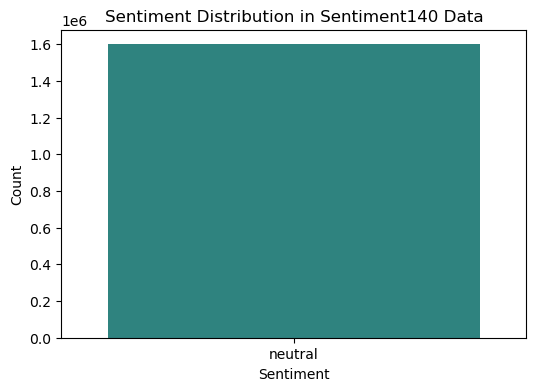

In [4]:
plot_sentiment_distribution(sentiment140_data, 'Sentiment140 Data')

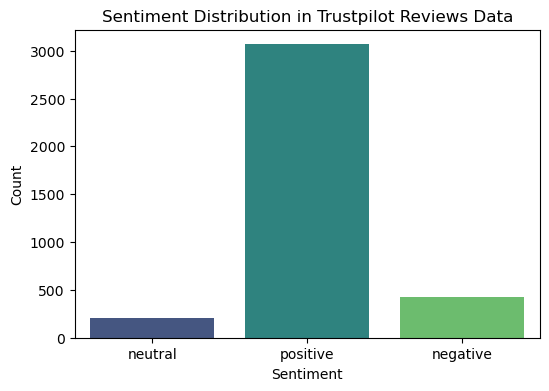

In [5]:
plot_sentiment_distribution(trustpilot_reviews_data, 'Trustpilot Reviews Data')

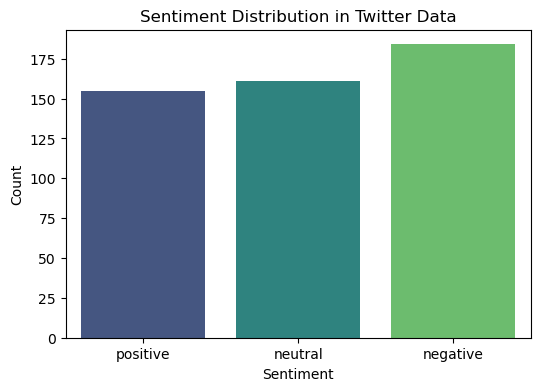

In [6]:
plot_sentiment_distribution(twitter_data, 'Twitter Data')

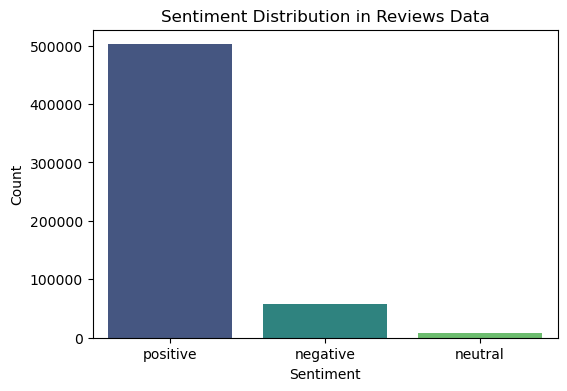

In [7]:
plot_sentiment_distribution(reviews_data, 'Reviews Data')

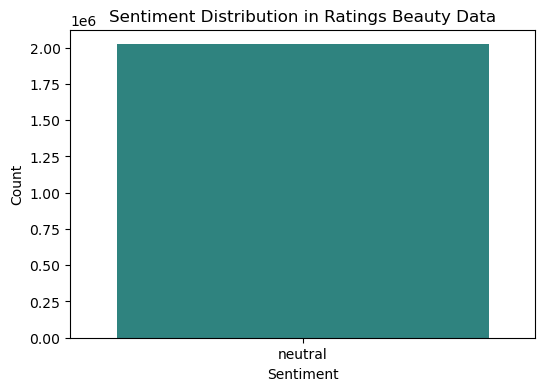

In [8]:
plot_sentiment_distribution(ratings_beauty_data, 'Ratings Beauty Data')

# Trend of Sentiment Over Time

In [9]:
# Convert dates to datetime format
sentiment140_data['Date'] = pd.to_datetime(sentiment140_data['Date'])
trustpilot_reviews_data['reviewed_at'] = pd.to_datetime(trustpilot_reviews_data['reviewed_at'])
twitter_data['date'] = pd.to_datetime(twitter_data['date'])
reviews_data['Time'] = pd.to_datetime(reviews_data['Time'], unit='s')  # If time is in UNIX format

# Plotting trend of sentiment over time
def plot_sentiment_trend(data, date_column, dataset_name):
    trend_data = data.groupby([date_column, 'sentiment']).size().unstack().fillna(0)
    trend_data.plot(figsize=(10,6))
    plt.title(f"Sentiment Trend Over Time in {dataset_name}")
    plt.ylabel("Number of Reviews")
    plt.show()

C:\Users\Global\AppData\Local\Temp\ipykernel_4052\3349510497.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:53 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  sentiment140_data['Date'] = pd.to_datetime(sentiment140_data['Date'])
C:\Users\Global\AppData\Local\Temp\ipykernel_4052\3349510497.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  twitter_data['date'] = pd.to_datetime(twitter_data['date'])


**Plot trends**

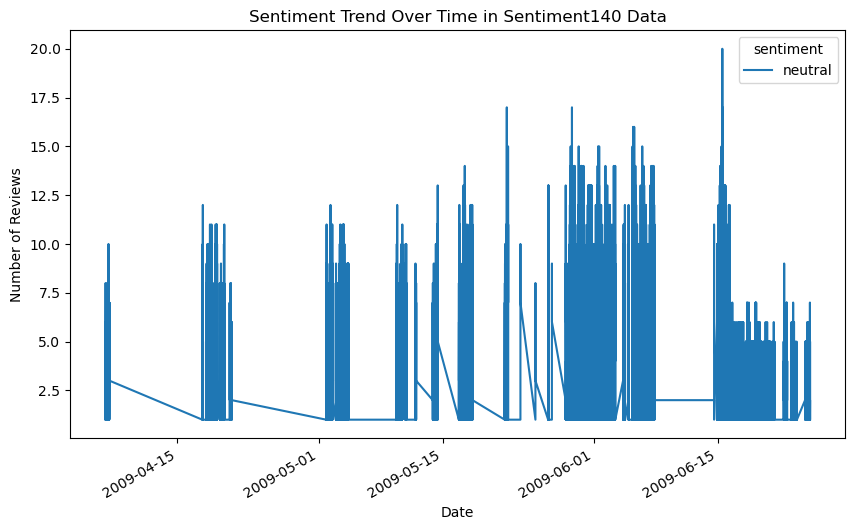

In [10]:
plot_sentiment_trend(sentiment140_data, 'Date', 'Sentiment140 Data')

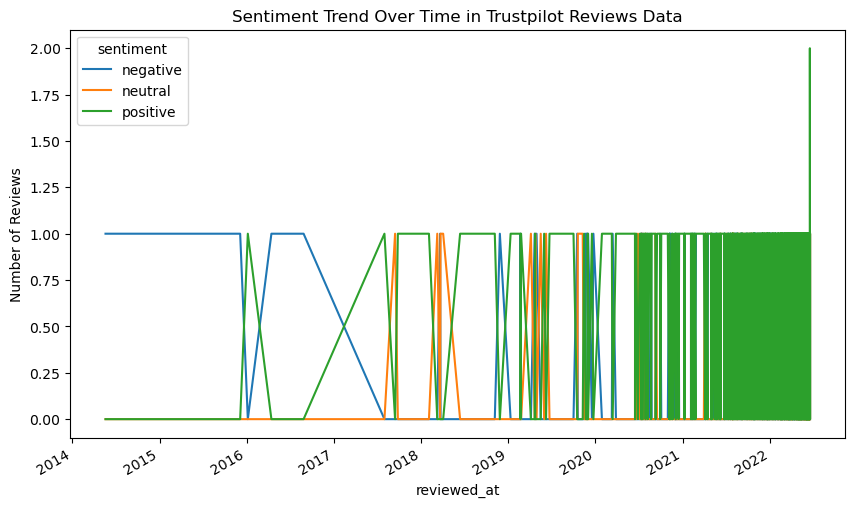

In [11]:
plot_sentiment_trend(trustpilot_reviews_data, 'reviewed_at', 'Trustpilot Reviews Data')

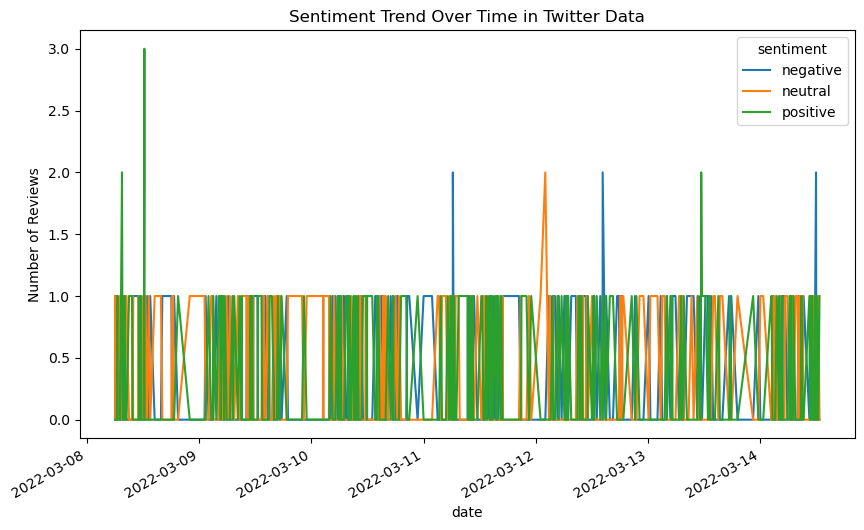

In [12]:
plot_sentiment_trend(twitter_data, 'date', 'Twitter Data')

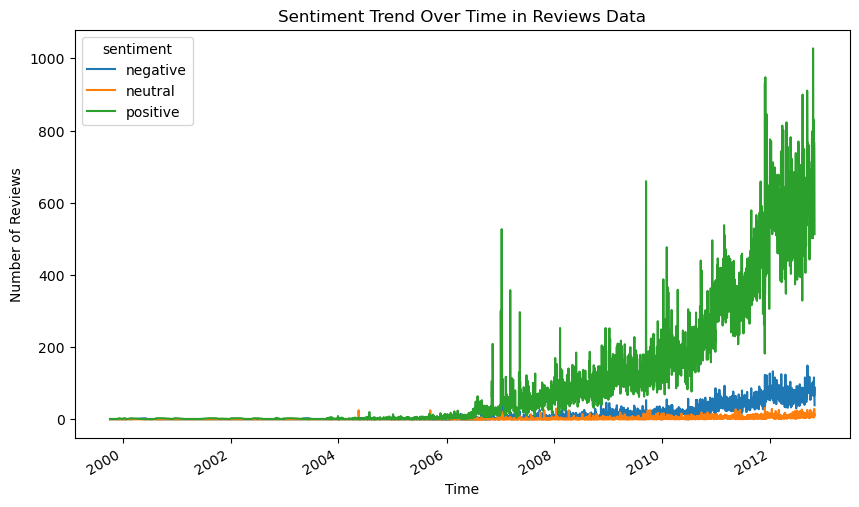

In [13]:
plot_sentiment_trend(reviews_data, 'Time', 'Reviews Data')

# Correlation Between Ratings and Sentiment

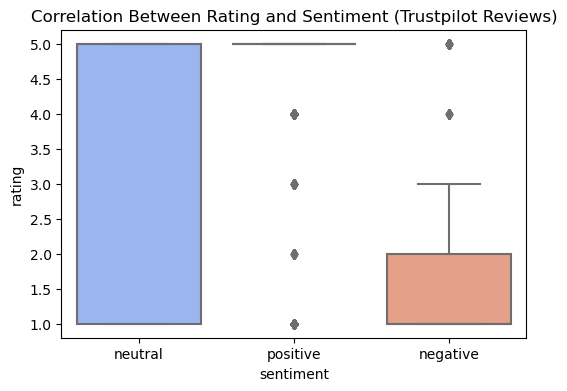

In [14]:
# For Trustpilot Reviews Data (since it has rating and sentiment columns)
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='rating', data=trustpilot_reviews_data, palette='coolwarm')
plt.title("Correlation Between Rating and Sentiment (Trustpilot Reviews)")
plt.show()

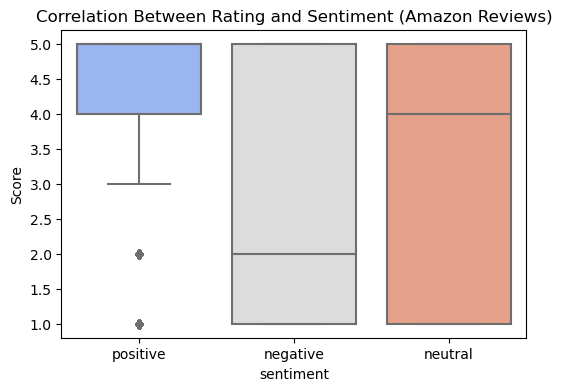

In [15]:
# For Reviews Data (Score represents rating)
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='Score', data=reviews_data, palette='coolwarm')
plt.title("Correlation Between Rating and Sentiment (Amazon Reviews)")
plt.show()

# Top Words Associated with Each Sentiment

In [16]:
from wordcloud import WordCloud

def generate_wordcloud(data, sentiment, dataset_name):
    filtered_data = data[data['sentiment'] == sentiment]
    print(f"Generating word cloud for sentiment: {sentiment}")
    print(f"Number of reviews for {sentiment}: {len(filtered_data)}")  # Check the count of reviews

    if len(filtered_data) > 0:  # Only proceed if there are reviews
        text = " ".join(review for review in filtered_data['Polarity'])  # Use the correct column name
        if text:  # Ensure text is not empty
            wordcloud = WordCloud(background_color="white", max_words=200).generate(text)
            
            plt.figure(figsize=(8, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f"Most Common Words for {sentiment.capitalize()} Sentiment ({dataset_name})")
            plt.axis("off")
            plt.show()
        else:
            print(f"No text found for sentiment: {sentiment}")
    else:
        print(f"No data available for sentiment: {sentiment}")


# Rating Distribution in Beauty Products

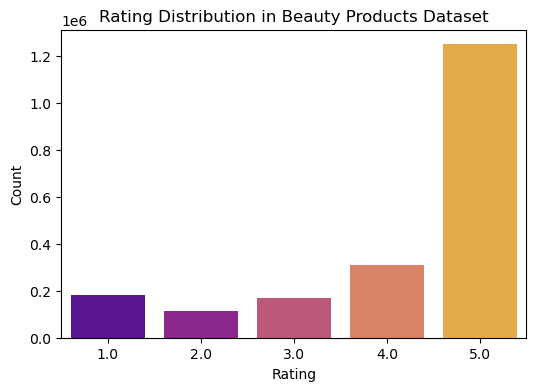

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=ratings_beauty_data, palette='plasma')
plt.title("Rating Distribution in Beauty Products Dataset")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Sentiment Analysis Insights Summary

In [18]:
def sentiment_summary(data, dataset_name):
    total_reviews = len(data)
    pos_reviews = len(data[data['sentiment'] == 'positive'])
    neg_reviews = len(data[data['sentiment'] == 'negative'])
    neu_reviews = len(data[data['sentiment'] == 'neutral'])
    
    print(f"Dataset: {dataset_name}")
    print(f"Total Reviews: {total_reviews}")
    print(f"Positive Reviews: {pos_reviews} ({pos_reviews/total_reviews:.2%})")
    print(f"Negative Reviews: {neg_reviews} ({neg_reviews/total_reviews:.2%})")
    print(f"Neutral Reviews: {neu_reviews} ({neu_reviews/total_reviews:.2%})")
    print("\n")

# Apply to all datasets
sentiment_summary(sentiment140_data, 'Sentiment140 Data')
sentiment_summary(trustpilot_reviews_data, 'Trustpilot Reviews Data')
sentiment_summary(twitter_data, 'Twitter Data')
sentiment_summary(reviews_data, 'Amazon Reviews Data')
sentiment_summary(ratings_beauty_data, 'Ratings Beauty Data')

Dataset: Sentiment140 Data
Total Reviews: 1599998
Positive Reviews: 0 (0.00%)
Negative Reviews: 0 (0.00%)
Neutral Reviews: 1599998 (100.00%)


Dataset: Trustpilot Reviews Data
Total Reviews: 3698
Positive Reviews: 3066 (82.91%)
Negative Reviews: 429 (11.60%)
Neutral Reviews: 203 (5.49%)


Dataset: Twitter Data
Total Reviews: 500
Positive Reviews: 155 (31.00%)
Negative Reviews: 184 (36.80%)
Neutral Reviews: 161 (32.20%)


Dataset: Amazon Reviews Data
Total Reviews: 568454
Positive Reviews: 502016 (88.31%)
Negative Reviews: 58051 (10.21%)
Neutral Reviews: 8387 (1.48%)


Dataset: Ratings Beauty Data
Total Reviews: 2023070
Positive Reviews: 0 (0.00%)
Negative Reviews: 0 (0.00%)
Neutral Reviews: 2023070 (100.00%)


